In [59]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
import tensorflow as tf

In [60]:
train_path="E:/SBIR/Selected/train"
test_path="E:/SBIR/Selected/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [61]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True)
test_datagen = ImageDataGenerator()

In [62]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=64,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=64,shuffle=False,class_mode='categorical')

Found 780 images belonging to 13 classes.
Found 260 images belonging to 13 classes.


In [63]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="E:/SBIR/Selected/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="E:/SBIR/Selected/test", target_size=(224,224))

Found 780 images belonging to 13 classes.
Found 260 images belonging to 13 classes.


In [64]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [65]:
pre_trained_model = InceptionV3(input_shape = (224,224,3) , include_top = False , weights = 'imagenet' , classes='13')

In [66]:
for layer in pre_trained_model.layers:
        layer.trainable=False

In [67]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_283 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_286 (Batch  (None, 111, 111, 32  96         ['conv2d_283[0][0]']             
 Normalization)                 )                                                      

In [68]:
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
x = pre_trained_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)

predictions = Dense(13, activation="softmax")(x)

In [38]:
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate

# Assume pre_trained_model is already defined
x = pre_trained_model.output

# Add a few convolutional layers
x = Convolution2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)

# Add a few dense layers with dropout and batch normalization
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

# Add the final dense layer with softmax activation
predictions = Dense(13, activation="softmax")(x)

In [69]:
model_ = Model(inputs=pre_trained_model.input, outputs=predictions)

In [70]:
model_.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_283 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_286 (Batch  (None, 111, 111, 32  96         ['conv2d_283[0][0]']             
 Normalization)                 )                                                           

In [41]:
# Stops the main frozen body of the architecture to be updated through backprop
for layer in model_.layers[:52]:
    layer.trainable = False


In [42]:
model_.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [61]:
for layer in model_.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001FB36EE4E50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001FB78BB4520> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001FB37363C40> False
<keras.layers.core.activation.Activation object at 0x000001FB10CA0B20> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001FB36EE4400> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001FB0EEBA250> False
<keras.layers.core.activation.Activation object at 0x000001FB0EEC5A60> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001FB0EEC5A90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001FB0EED3F10> False
<keras.layers.core.activation.Activation object at 0x000001FB0EED34F0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001FB0EEC6070> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001FB0C8726

In [73]:

# compile the model
model_.compile(optimizer=SGD(lr=0.001, momentum=0.9)
                    , loss='categorical_crossentropy'
                    , metrics=['accuracy'])

In [63]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
H = model_.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[es])

C:\Users\Yahya Akel\AppData\Local\Temp\ipykernel_5516\4288076846.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model_.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[es])


Epoch 1/100
 8/25 [========>.....................] - ETA: 52s - loss: 2.7272 - accuracy: 0.0742

KeyboardInterrupt: 

In [9]:
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
incep = Sequential()
incep.add(pre_trained_model)
incep.add(GlobalAveragePooling2D())
incep.add(Flatten())
incep.add(Dense(512, activation='relu'))
incep.add(Dropout(0.2))
incep.add(Dense(13, activation='softmax'))

In [10]:
incep.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                        

In [11]:
for layer in incep.layers:
    print(layer, layer.trainable)

<keras.engine.functional.Functional object at 0x00000201D1B93790> True
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x00000201D1B9DFD0> True
<keras.layers.reshaping.flatten.Flatten object at 0x00000201D1B9D8E0> True
<keras.layers.core.dense.Dense object at 0x00000201D1ECEAF0> True
<keras.layers.regularization.dropout.Dropout object at 0x00000201D042AEB0> True
<keras.layers.core.dense.Dense object at 0x00000201D1EA5640> True


In [22]:
from keras.optimizers import Adam

model_.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

e:\Ana\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
H = incep.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[es])

C:\Users\Yahya Akel\AppData\Local\Temp\ipykernel_22220\2247221170.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = incep.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[es])


Epoch 1/100
25/25 [==============================] - 50s 2s/step - loss: 57.3840 - accuracy: 0.1244 - val_loss: 16.9231 - val_accuracy: 0.2346
Epoch 2/100
25/25 [==============================] - 28s 1s/step - loss: 8.7694 - accuracy: 0.1590 - val_loss: 3.1740 - val_accuracy: 0.1692
Epoch 3/100
25/25 [==============================] - 29s 1s/step - loss: 2.5398 - accuracy: 0.1154 - val_loss: 2.4336 - val_accuracy: 0.1692
Epoch 4/100
 4/25 [===>..........................] - ETA: 19s - loss: 2.5061 - accuracy: 0.1016

KeyboardInterrupt: 

In [ ]:
import pickle
with open('model_incep.pkl', 'wb') as file:
      pickle.dump(incep, file)

In [33]:
# Renders the charts for training accuracy and loss.
import matplotlib.pyplot as plt
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

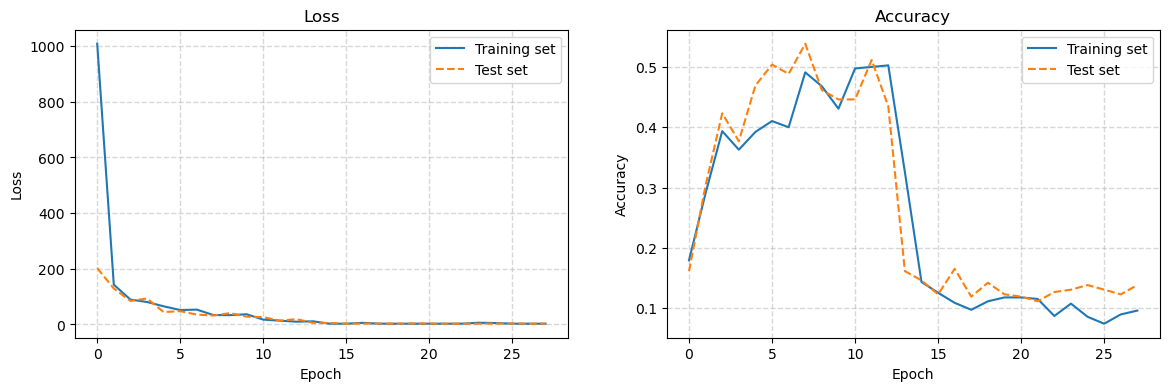

In [34]:
render_training_history(H)

In [21]:
history = model_.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size)


Epoch 1/10
24/24 [==============================] - 34s 1s/step - loss: 100.6146 - accuracy: 0.1016 - val_loss: 29.9200 - val_accuracy: 0.1094
Epoch 2/10
24/24 [==============================] - 28s 1s/step - loss: 14.5599 - accuracy: 0.2059 - val_loss: 8.4499 - val_accuracy: 0.2344
Epoch 3/10
24/24 [==============================] - 28s 1s/step - loss: 5.1948 - accuracy: 0.2794 - val_loss: 5.4076 - val_accuracy: 0.2422
Epoch 4/10
24/24 [==============================] - 28s 1s/step - loss: 3.2310 - accuracy: 0.3048 - val_loss: 4.6588 - val_accuracy: 0.3242
Epoch 5/10
24/24 [==============================] - 28s 1s/step - loss: 2.8087 - accuracy: 0.3476 - val_loss: 3.1663 - val_accuracy: 0.3477
Epoch 6/10
24/24 [==============================] - 29s 1s/step - loss: 2.4627 - accuracy: 0.3476 - val_loss: 2.8149 - val_accuracy: 0.3359
Epoch 7/10
24/24 [==============================] - 30s 1s/step - loss: 2.3994 - accuracy: 0.3703 - val_loss: 3.5852 - val_accuracy: 0.3164
Epoch 8/10
24/24

In [23]:
history = model_.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size)

Epoch 1/10
24/24 [==============================] - 33s 1s/step - loss: 5.0594 - accuracy: 0.2553 - val_loss: 2.8190 - val_accuracy: 0.2344
Epoch 2/10
24/24 [==============================] - 27s 1s/step - loss: 2.1601 - accuracy: 0.2741 - val_loss: 2.1832 - val_accuracy: 0.3125
Epoch 3/10
24/24 [==============================] - 28s 1s/step - loss: 1.9437 - accuracy: 0.3516 - val_loss: 2.0927 - val_accuracy: 0.3008
Epoch 4/10
24/24 [==============================] - 28s 1s/step - loss: 1.9847 - accuracy: 0.3409 - val_loss: 2.2989 - val_accuracy: 0.2734
Epoch 5/10
24/24 [==============================] - 28s 1s/step - loss: 1.9002 - accuracy: 0.3529 - val_loss: 2.0386 - val_accuracy: 0.3438
Epoch 6/10
24/24 [==============================] - 29s 1s/step - loss: 1.9015 - accuracy: 0.3570 - val_loss: 2.0094 - val_accuracy: 0.3047
Epoch 7/10
24/24 [==============================] - 28s 1s/step - loss: 1.8982 - accuracy: 0.3623 - val_loss: 2.3896 - val_accuracy: 0.2812
Epoch 8/10
24/24 [==

In [31]:
history = model_.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size)

Epoch 1/10
12/12 [==============================] - 28s 2s/step - loss: 1.7141 - accuracy: 0.3869 - val_loss: 2.1489 - val_accuracy: 0.2930
Epoch 2/10
12/12 [==============================] - 27s 2s/step - loss: 1.6433 - accuracy: 0.4064 - val_loss: 2.2458 - val_accuracy: 0.3477
Epoch 3/10
12/12 [==============================] - 27s 2s/step - loss: 1.7265 - accuracy: 0.4050 - val_loss: 1.9894 - val_accuracy: 0.4141
Epoch 4/10
12/12 [==============================] - 27s 2s/step - loss: 1.5589 - accuracy: 0.4665 - val_loss: 1.9632 - val_accuracy: 0.3711
Epoch 5/10
12/12 [==============================] - 26s 2s/step - loss: 1.5501 - accuracy: 0.4721 - val_loss: 2.0122 - val_accuracy: 0.3672
Epoch 6/10
12/12 [==============================] - 27s 2s/step - loss: 1.5834 - accuracy: 0.4358 - val_loss: 2.1245 - val_accuracy: 0.4141
Epoch 7/10
12/12 [==============================] - 26s 2s/step - loss: 1.5724 - accuracy: 0.4413 - val_loss: 1.7731 - val_accuracy: 0.4180
Epoch 8/10
12/12 [==

In [35]:
history = model_.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size)

Epoch 1/10
12/12 [==============================] - 27s 2s/step - loss: 1.5084 - accuracy: 0.4777 - val_loss: 1.7014 - val_accuracy: 0.4336
Epoch 2/10
12/12 [==============================] - 27s 2s/step - loss: 1.5521 - accuracy: 0.4860 - val_loss: 1.7426 - val_accuracy: 0.3945
Epoch 3/10
12/12 [==============================] - 27s 2s/step - loss: 1.5801 - accuracy: 0.4511 - val_loss: 1.9999 - val_accuracy: 0.3711
Epoch 4/10
12/12 [==============================] - 27s 2s/step - loss: 1.5412 - accuracy: 0.4455 - val_loss: 1.8919 - val_accuracy: 0.3906
Epoch 5/10
12/12 [==============================] - 27s 2s/step - loss: 1.5454 - accuracy: 0.4595 - val_loss: 2.0228 - val_accuracy: 0.3242
Epoch 6/10
12/12 [==============================] - 27s 2s/step - loss: 1.6069 - accuracy: 0.4232 - val_loss: 1.8288 - val_accuracy: 0.3867
Epoch 7/10
11/12 [==========================>...] - ETA: 1s - loss: 1.5312 - accuracy: 0.4688

KeyboardInterrupt: 

In [37]:
history = model_.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size)

Epoch 1/10
12/12 [==============================] - 32s 2s/step - loss: 1.4242 - accuracy: 0.5084 - val_loss: 1.7974 - val_accuracy: 0.3828
Epoch 2/10
12/12 [==============================] - 27s 2s/step - loss: 1.3687 - accuracy: 0.5126 - val_loss: 1.7276 - val_accuracy: 0.4258
Epoch 3/10
12/12 [==============================] - 27s 2s/step - loss: 1.3874 - accuracy: 0.5293 - val_loss: 1.8814 - val_accuracy: 0.4023
Epoch 4/10
12/12 [==============================] - 27s 2s/step - loss: 1.4064 - accuracy: 0.5126 - val_loss: 1.8413 - val_accuracy: 0.4023
Epoch 5/10
12/12 [==============================] - 27s 2s/step - loss: 1.4034 - accuracy: 0.5126 - val_loss: 1.8998 - val_accuracy: 0.4180
Epoch 6/10
12/12 [==============================] - 27s 2s/step - loss: 1.3704 - accuracy: 0.5196 - val_loss: 1.8350 - val_accuracy: 0.4102
Epoch 7/10
12/12 [==============================] - 26s 2s/step - loss: 1.3926 - accuracy: 0.5293 - val_loss: 1.7916 - val_accuracy: 0.4062
Epoch 8/10
 5/12 [==

KeyboardInterrupt: 

In [74]:
history = model_.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size)

Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 2.4475 - accuracy: 0.1997

KeyboardInterrupt: 